# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [1]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

## Part1: Linear Regression

E_train_list is [0.02, 0.03, 0.02, 0.02, 0.01, 0.03, 0.0, 0.03, 0.04, 0.03, 0.02, 0.03, 0.04, 0.02, 0.04, 0.02, 0.1, 0.11, 0.01, 0.03, 0.05, 0.03, 0.02, 0.01, 0.01, 0.04, 0.02, 0.04, 0.03, 0.09, 0.0, 0.02, 0.04, 0.04, 0.03, 0.07, 0.04, 0.03, 0.03, 0.06, 0.01, 0.11, 0.1, 0.0, 0.0, 0.01, 0.12, 0.01, 0.04, 0.04, 0.06, 0.11, 0.01, 0.03, 0.0, 0.02, 0.02, 0.05, 0.01, 0.01, 0.03, 0.12, 0.07, 0.09, 0.03, 0.07, 0.07, 0.02, 0.08, 0.03, 0.04, 0.04, 0.03, 0.04, 0.03, 0.04, 0.01, 0.07, 0.03, 0.13, 0.04, 0.0, 0.09, 0.04, 0.02, 0.0, 0.04, 0.0, 0.07, 0.01, 0.01, 0.01, 0.01, 0.04, 0.02, 0.08, 0.12, 0.01, 0.02, 0.02, 0.01, 0.05, 0.03, 0.02, 0.04, 0.03, 0.02, 0.01, 0.03, 0.03, 0.01, 0.11, 0.07, 0.03, 0.0, 0.05, 0.04, 0.08, 0.01, 0.05, 0.13, 0.01, 0.05, 0.09, 0.04, 0.02, 0.09, 0.01, 0.02, 0.02, 0.01, 0.11, 0.02, 0.0, 0.04, 0.03, 0.07, 0.02, 0.05, 0.14, 0.01, 0.01, 0.02, 0.04, 0.0, 0.07, 0.02, 0.0, 0.11, 0.03, 0.01, 0.06, 0.05, 0.03, 0.05, 0.01, 0.11, 0.04, 0.06, 0.04, 0.05, 0.02, 0.03, 0.08, 0.08, 0.0, 0.

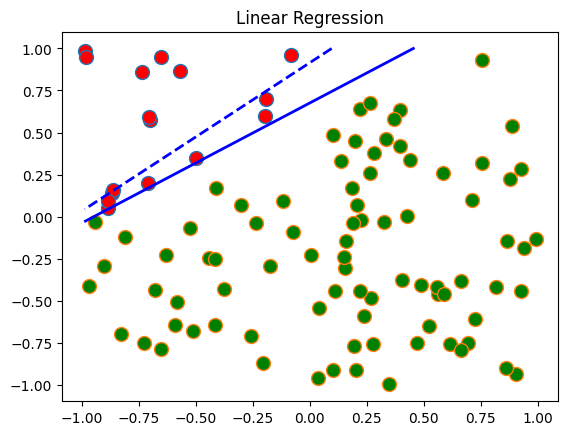

In [2]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
E_train_list = [] # store the training error

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = linear_regression(X, y)
    #TODO


    # Compute training error
    newX = np.vstack([(np.ones(X.shape[1])),X]) # w is 3*1
    y_pred = np.dot(newX.T, w_g) # 100*1
    y_pred = y_pred.T   # 1*100
    
    for i in range(len(y_pred[0])):
        if(y_pred[0][i] > 0):
            y_pred[0][i] = 1
        else:
            y_pred[0][i] = -1
    E_train_list.append(np.mean(y_pred != y))

print('E_train_list is {}'.format(E_train_list))

E_train = np.mean(E_train_list)
print('E_train is {}'.format(E_train))

plotdata(X, y, w_f, w_g, 'Linear Regression');



## Part2: Linear Regression: noisy

E_train_list is [0.17, 0.13, 0.11, 0.12, 0.15, 0.14, 0.16, 0.2, 0.18, 0.14, 0.12, 0.13, 0.19, 0.11, 0.12, 0.17, 0.11, 0.12, 0.17, 0.12, 0.15, 0.11, 0.11, 0.16, 0.14, 0.2, 0.11, 0.16, 0.1, 0.11, 0.12, 0.11, 0.16, 0.15, 0.17, 0.11, 0.16, 0.14, 0.13, 0.1, 0.15, 0.1, 0.14, 0.14, 0.13, 0.17, 0.13, 0.16, 0.11, 0.14, 0.17, 0.15, 0.15, 0.15, 0.09, 0.16, 0.11, 0.15, 0.17, 0.14, 0.18, 0.18, 0.11, 0.13, 0.13, 0.12, 0.15, 0.11, 0.14, 0.14, 0.13, 0.14, 0.12, 0.11, 0.13, 0.13, 0.12, 0.16, 0.16, 0.14, 0.19, 0.11, 0.13, 0.16, 0.11, 0.11, 0.17, 0.11, 0.14, 0.13, 0.14, 0.17, 0.12, 0.14, 0.1, 0.13, 0.11, 0.2, 0.19, 0.14, 0.1, 0.11, 0.09, 0.19, 0.1, 0.16, 0.17, 0.15, 0.09, 0.1, 0.11, 0.08, 0.14, 0.18, 0.13, 0.1, 0.14, 0.11, 0.12, 0.1, 0.18, 0.16, 0.21, 0.14, 0.16, 0.17, 0.17, 0.15, 0.1, 0.12, 0.21, 0.08, 0.11, 0.11, 0.12, 0.11, 0.13, 0.13, 0.15, 0.1, 0.16, 0.11, 0.1, 0.16, 0.21, 0.14, 0.1, 0.12, 0.12, 0.14, 0.14, 0.12, 0.13, 0.14, 0.19, 0.14, 0.12, 0.16, 0.11, 0.17, 0.09, 0.14, 0.18, 0.12, 0.15, 0.12, 0.1

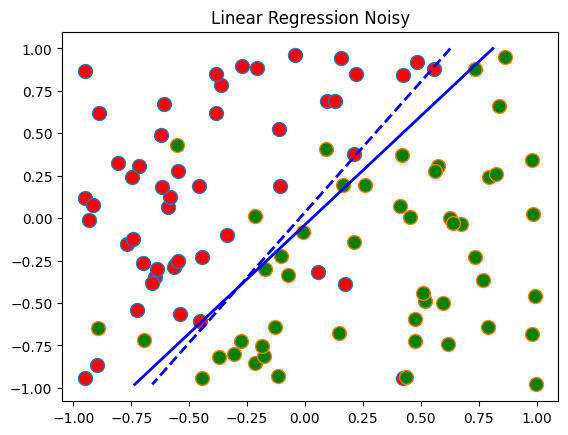

In [3]:
nRep = 1000  # number of replicates
nTrain = 100 # number of training data
E_train_list = [] # store the training error

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = linear_regression(X, y)
    #TODO


    # Compute training error
    newX = np.vstack([(np.ones(X.shape[1])),X]) # w is 3*1
    y_pred = np.dot(newX.T, w_g) # 100*1
    y_pred = y_pred.T   # 1*100
    
    for i in range(len(y_pred[0])):
        if(y_pred[0][i] > 0):
            y_pred[0][i] = 1
        else:
            y_pred[0][i] = -1
    E_train_list.append(np.mean(y_pred != y))

print('E_train_list is {}'.format(E_train_list))

E_train = np.mean(E_train_list)
print('E_train is {}'.format(E_train))

plotdata(X, y, w_f, w_g, 'Linear Regression Noisy');


## Part3: Linear Regression: poly_fit

In [4]:
import scipy.io as sio

poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)

#TODO
# Compute training, testing error
# Compute training error

newX = np.vstack([(np.ones(X.shape[1])),X]) # w is 3*1
y_pred = np.dot(newX.T, w_g) # 100*1
y_pred = y_pred.T   # 1*100

for i in range(len(y_pred[0])):
    if(y_pred[0][i] > 0):
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = -1
E_train = np.mean(y_pred != y)


# Compute testing error
newX_test = np.vstack([(np.ones(X_test.shape[1])),X_test]) # w is 3*1
y_pred_test = np.dot(newX_test.T, w_g) # 100*1
y_pred_test = y_pred_test.T   # 1*100

for i in range(len(y_pred_test[0])):
    if(y_pred_test[0][i] > 0):
        y_pred_test[0][i] = 1
    else:
        y_pred_test[0][i] = -1
E_test = np.mean(y_pred_test != y_test)
print("Before transformation")
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = X  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = X_test  # CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
#TODO
# Compute training, testing error
# Compute training error

newX_t = np.vstack([(np.ones(X_t.shape[1])),X_t]) # w is 3*1
y_pred = np.dot(newX_t.T, w_g) # 100*1
y_pred = y_pred.T   # 1*100

for i in range(len(y_pred[0])):
    if(y_pred[0][i] > 0):
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = -1
E_train = np.mean(y_pred != y)


# Compute testing error
newX_test_t = np.vstack([(np.ones(X_test_t.shape[1])),X_test_t]) # w is 3*1
y_pred_test = np.dot(newX_test_t.T, w_g) # 100*1
y_pred_test = y_pred_test.T   # 1*100

for i in range(len(y_pred_test[0])):
    if(y_pred_test[0][i] > 0):
        y_pred_test[0][i] = 1
    else:
        y_pred_test[0][i] = -1
E_test = np.mean(y_pred_test != y_test)

print("After transformation")
print('E_train is {}, E_test is {}'.format(E_train, E_test))

Before transformation
E_train is 0.57, E_test is 0.5085
After transformation
E_train is 0.57, E_test is 0.5085


## Part4: Logistic Regression

E_train is 0.021399999999999995


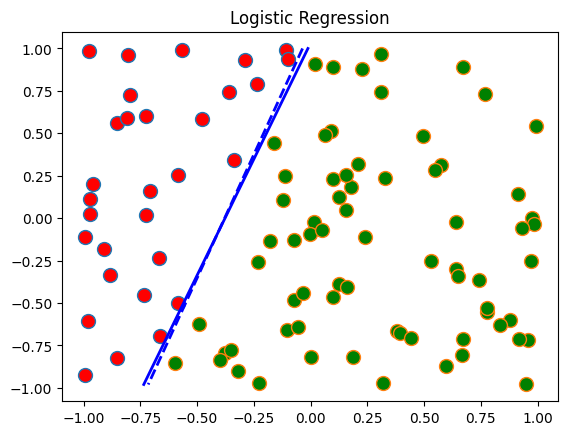

In [5]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
E_train_list = [] # store the training error

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y)
    #TODO
    # Compute training error
    # Step 1: Calculate the predictions using logistic regression
    X_bias = np.vstack([np.ones((1, X.shape[1])), X])  # Add bias term to X
    z = np.dot(w_g.T, X_bias)  # Linear combination
    predictions_prob = 1 / (1 + np.exp(-z))  # Apply the sigmoid function to get probabilities
    
    # Step 2: Convert probabilities to binary labels (0 or 1)
    predictions_bin = (predictions_prob >= 0.5).astype(int)  # Threshold at 0.5
    y_pred = 2 * predictions_bin -1 # Convert 0/1 to -1/1
    
    # Step 3: Calculate the training error (E_train)
    # E_train is the fraction of incorrect predictions
    E_train_list.append(np.mean(y_pred != y))

# Print the average training error over all replicates
E_train = np.mean(E_train_list)
print('E_train is {}'.format(E_train))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part5: Logistic Regression: noisy

E_train is 0.09046666666666667


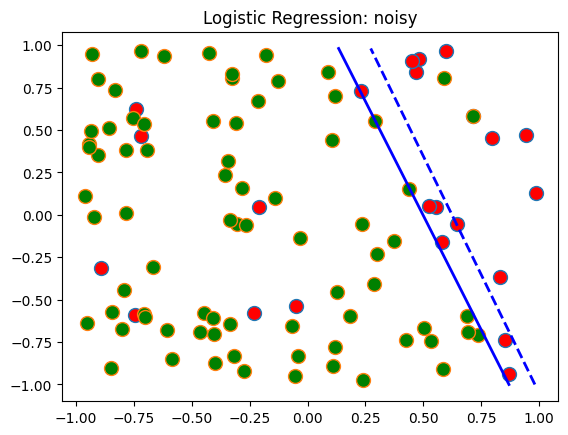

In [7]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    #TODO
    # Compute training error
    # Step 1: Calculate the predictions using logistic regression
    X_bias = np.vstack([np.ones((1, X.shape[1])), X])  # Add bias term to X
    z = np.dot(w_g.T, X_bias)  # Linear combination
    predictions_prob = 1 / (1 + np.exp(-z))  # Apply the sigmoid function to get probabilities
    
    # Step 2: Convert probabilities to binary labels (0 or 1)
    predictions_bin = (predictions_prob >= 0.5).astype(int)  # Threshold at 0.5
    y_pred = 2 * predictions_bin -1 # Convert 0/1 to -1/1
    
    # Step 3: Calculate the training error (E_train)
    # E_train is the fraction of incorrect predictions
    E_train_list.append(np.mean(y_pred != y))

# Print the average training error over all replicates
E_train = np.mean(E_train_list)
print('E_train is {}'.format(E_train))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part6: SVM

E_train is 0.0
Average number of support vectors is 151.838


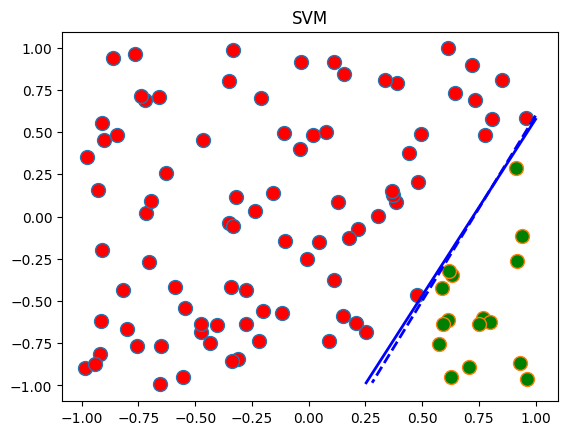

In [67]:
from svm import svm

nRep = 1000; # number of replica tes
nTrain = 100; # number of training data
E_train_list = [] # store the training error
support_vectors = []

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    #TODO


    # Compute training error
    newX = np.vstack([(np.ones(X.shape[1])),X]) # w is 3*1
    y_pred = np.dot(newX.T, w_g) # 100*1
    y_pred = y_pred.T   # 1*100
    
    for i in range(len(y_pred[0])):
        if(y_pred[0][i] > 0):
            y_pred[0][i] = +1
        else:
            y_pred[0][i] = -1

    E_train_list.append(np.mean(y_pred != y))
    support_vectors.append(num_sc)


E_train = np.mean(E_train_list)
print('E_train is {}'.format(E_train))

Num_of_support_vectors = np.mean(support_vectors)
print('Average number of support vectors is {}'.format(Num_of_support_vectors))


plotdata(X, y, w_f, w_g, 'SVM')

## Part7: Preceptron

E_train is 5e-05
Average number of iterations is 32.592.


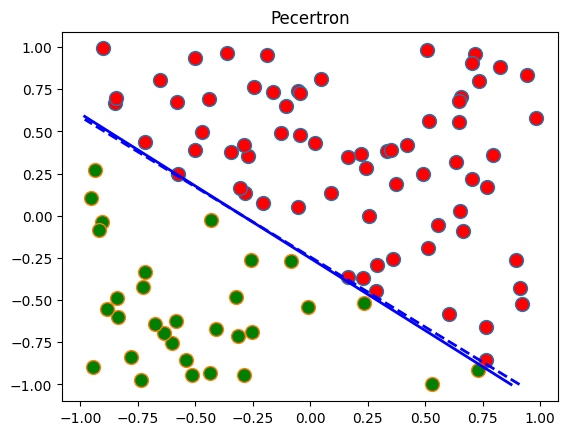

In [52]:
from perceptron import perceptron

E_train_list = []
iters_list = []

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, iters = perceptron(X, y)
    #TODO


    # Compute training error
    newX = np.vstack([(np.ones(X.shape[1])),X]) # w is 3*1
    y_pred = np.dot(newX.T, w_g) # 100*1
    y_pred = y_pred.T   # 1*100
    
    for i in range(len(y_pred[0])):
        if(y_pred[0][i] > 0):
            y_pred[0][i] = 1
        else:
            y_pred[0][i] = -1
    E_train_list.append(np.mean(y_pred != y))
    iters_list.append(iters)

E_train = np.mean(E_train_list)
print('E_train is {}'.format(E_train))
avgIter = np.mean(iters_list)
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X, y, w_f, w_g, 'Pecertron')

## Part8: Preceptron: Non-linearly separable case

E_train is 0.2
Number of iterations is 1000.


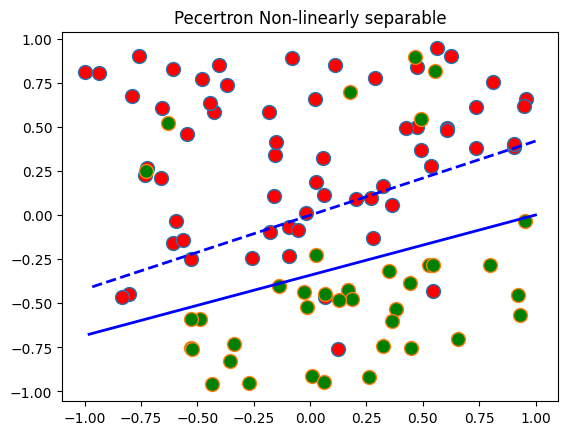

In [54]:
nTrain = 100 # number of training data
X, y, w_f = mkdata(nTrain, 'noisy')
w_g, iters = perceptron(X, y)
#TODO
# Compute training error
newX = np.vstack([(np.ones(X.shape[1])),X]) # w is 3*1
y_pred = np.dot(newX.T, w_g) # 100*1
y_pred = y_pred.T   # 1*100

for i in range(len(y_pred[0])):
    if(y_pred[0][i] > 0):
        y_pred[0][i] = 1
    else:
        y_pred[0][i] = -1
E_train = np.mean(y_pred != y)
print('E_train is {}'.format(E_train))
print('Number of iterations is {}.'.format(iters))
plotdata(X, y, w_f, w_g, 'Pecertron Non-linearly separable')